<a href="https://colab.research.google.com/github/1nsidewill/News-Simpler/blob/jmin1117-patch-2/btsNews_summary_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 드라이브 연결

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive') # 구글 드라이브 연동 --- colab과 드라이브 연결! 꼭 해줘야함!! 

my_path = '/content/notebooks'
# Colab Notebooks 안에 packages 폴더에 모듈 패키지 설치되어 있으므로 연결
os.symlink('/content/drive/My Drive/Colab Notebooks/packages', my_path)
sys.path.insert(0, my_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  install

In [2]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [3]:
 cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [4]:
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 63.8MB/s 
     |████████████████████████████████| 92kB 12.5MB/s 
     |████████████████████████████████| 460kB 53.4MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-02-13 04:27:43--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downl

In [5]:
# # 확인
# from konlpy.tag import Mecab 
# mecab = Mecab() 
# text = '이제 구글 코랩에서 Mecab-ko라이브러리 사용이 가능합니다. 읽어주셔서 감사합니다.'
# nouns = mecab.nouns(text) 
# print(nouns)

## matplotlib 한글폰트

https://teddylee777.github.io/colab/colab-korean

In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,747 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146710 files and di

In [7]:
!pip install rhinoMorph

     |████████████████████████████████| 3.0MB 8.9MB/s 


# data

In [1]:
from datetime import datetime 
import numpy as np
import pandas as pd
import re
from konlpy.tag import Mecab
from konlpy.tag import Okt
import rhinoMorph
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import seaborn as sns

In [2]:
data_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ext/news_df_210205_v03.xlsx')
data_df.head()

media  ...                                                url
0  조선일보  ...  https://news.naver.com/main/read.nhn?mode=LSD&...
1  조선일보  ...  https://news.naver.com/main/read.nhn?mode=LSD&...
2  조선일보  ...  https://news.naver.com/main/read.nhn?mode=LSD&...
3  조선일보  ...  https://news.naver.com/main/read.nhn?mode=LSD&...
4  조선일보  ...  https://news.naver.com/main/read.nhn?mode=LSD&...

[5 rows x 5 columns]

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   media             871 non-null    object
 1   date              871 non-null    object
 2   title             871 non-null    object
 3   article_original  863 non-null    object
 4   url               871 non-null    object
dtypes: object(5)
memory usage: 34.1+ KB


In [4]:
data_df.article_original.isna().sum()

8

In [5]:
data_df.loc[data_df.article_original.isna()]

media  ...                                                url
167  중앙일보  ...  https://news.naver.com/main/read.nhn?mode=LSD&...
221  조선일보  ...  https://news.naver.com/main/read.nhn?mode=LSD&...
415   한겨레  ...  https://news.naver.com/main/read.nhn?mode=LSD&...
417  경향신문  ...  https://news.naver.com/main/read.nhn?mode=LSD&...
675   한겨레  ...  https://news.naver.com/main/read.nhn?mode=LSD&...
678  경향신문  ...  https://news.naver.com/main/read.nhn?mode=LSD&...
738  중앙일보  ...  https://news.naver.com/main/read.nhn?mode=LSD&...
774  경향신문  ...  https://news.naver.com/main/read.nhn?mode=LSD&...

[8 rows x 5 columns]

In [6]:
data_df.dropna(inplace=True)

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 870
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   media             863 non-null    object
 1   date              863 non-null    object
 2   title             863 non-null    object
 3   article_original  863 non-null    object
 4   url               863 non-null    object
dtypes: object(5)
memory usage: 40.5+ KB


In [8]:
print(type(data_df.article_original[0]))
data_df.article_original[0]

<class 'str'>


'2012년 싸이에 이어 두 번째… ABC방송 라이브 쇼에서 생중계\n \n\n\n\n 전 지구를 홀린 그룹입니다 \n \n\n 사회자의 소개와 함께 방탄소년단 BTS 이 모습을 드러냈다. 2019년의 마지막 날 미국 뉴욕 맨해튼 타임스스퀘어 무대에 선 것이다. 12월 31일 현지 시각 저녁 열리는 타임스스퀘어 볼드롭 대형 크리스털 볼이 신년 카운트다운과 함께 떨어지는 행사 을 보기 위해 몰려든 사람들로 이곳은 오전부터 부산스러웠다. 매년 이날만 되면 최소 100만명이 찾는 곳이지만 올해는 BTS 때문에 열기가 더욱 뜨거웠다. 뉴욕경찰 NYPD 은 이날 몰린 인파가 150만명이라고 추정했다.\n \n\n 한국 가수로 타임스스퀘어 새해맞이 무대에 오른 건 2012년 싸이에 이어 두 번째다. BTS는 밤 10시 38분부터 8분간 열정적인 춤과 노래로 시선을 사로잡았다. 8년 전 100만 인파가 싸이의 강남스타일 에 맞춰 말춤 을 췄던 것처럼 이날 타임스스퀘어에 모인 전 세계 아미 BTS 팬 들은 BTS가 작은 것들을 위한 시 와 Make It Right 를 부를 때 야광봉을 흔들며 한국어로 떼창을 선사했다. 공연을 마친 뒤 리더 RM은 여섯 살 때부터 나 홀로 집에 같은 영화에서 보던 광경이 눈앞에 있다 며 감격했다. 멤버들은 한목소리로 해피 뉴 이어 를 외쳤다.\n \n\n BTS 공연은 미국 최대 새해맞이 라이브 쇼인 ABC방송의 뉴 이어스 로킹 이브 New Year s Rocking Eve 를 통해서도 생중계됐다. 최정상급 가수들만 출연하는 유명 프로그램이다. 올해는 BTS 외에 컨트리 가수 샘 헌트와 싱어송 라이터 앨러니스 모리세트가 무대에 섰다. BTS는 2017년 사전 녹화를 통해 할리우드 무대에 출연했지만 타임스스퀘어 무대에 직접 선 것은 이번이 처음이다. 행사를 공동 진행한 라이언 시크레스트는 올해 타임스스퀘어의 절반은 BTS 팬으로 채워질 것 이라고 언급했다.\n \n\n BTS의 인기를 입증하듯 이날 오후부터 타임스스퀘어 주변 곳곳에선 BTS 노

In [9]:
data_df.article_original = data_df.article_original.apply(lambda x : re.sub(r'[^A-Za-z0-9가-힣 ]','',x))   # cleaning

## Mecab  형태소 토큰화

In [10]:
mecab = Mecab()

In [11]:
data_df['tokenized_mecab'] = data_df.article_original.apply(lambda x : mecab.morphs(x))  # 형태소 토큰화

In [12]:
print(data_df['tokenized_mecab'][0])

['2012', '년', '싸이', '에', '이어', '두', '번', '째', 'ABC', '방송', '라이브', '쇼', '에서', '생', '중계', '전', '지구', '를', '홀린', '그룹', '입니다', '사회', '자', '의', '소개', '와', '함께', '방탄소년단', 'BTS', '이', '모습', '을', '드러냈', '다', '2019', '년', '의', '마지막', '날', '미국', '뉴욕', '맨해튼', '타임스스퀘어', '무대', '에', '선', '것', '이', '다', '12', '월', '31', '일', '현지', '시각', '저녁', '열리', '는', '타임스', '스퀘어', '볼', '드롭', '대형', '크리스털', '볼', '이', '신년', '카운트다운', '과', '함께', '떨어지', '는', '행사', '을', '보', '기', '위해', '몰려든', '사람', '들', '로', '이곳', '은', '오전', '부터', '부산', '스러웠', '다', '매년', '이날', '만', '되', '면', '최소', '100', '만', '명', '이', '찾', '는', '곳', '이', '지만', '올해', '는', 'BTS', '때문', '에', '열기', '가', '더욱', '뜨거웠', '다', '뉴욕', '경찰', 'NYPD', '은', '이날', '몰린', '인파', '가', '150', '만', '명', '이', '라고', '추정', '했', '다', '한국', '가수', '로', '타임스', '스퀘어', '새해맞이', '무대', '에', '오른', '건', '2012', '년', '싸이', '에', '이어', '두', '번', '째', '다', 'BTS', '는', '밤', '10', '시', '38', '분', '부터', '8', '분', '간', '열정', '적', '인', '춤', '과', '노래', '로', '시선', '을', '사로잡', '았', '다', '8', '년', '전',

In [13]:
stopword = open('/content/drive/MyDrive/Colab Notebooks/data/stopwords_kor.txt', 'r').read().split('\n')
print(len(stopword))
stopword[:10]

675


['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']

In [14]:
data_df.tokenized_mecab = data_df.tokenized_mecab.apply(lambda x : [w for w in x if w not in stopword]) # 불용어 제거

In [15]:
data_df.tokenized_mecab.head(5)

0    [2012, 싸이, 이어, 두, 번, 째, ABC, 방송, 라이브, 쇼, 생, 중계...
1    [방탄소년단, BTS, 미국, CNN, 선정, 2010, 대, 음악, 변화, 시킨,...
2    [트, 이스, 도쿄, 돔, 공연, 블랙, 핑크, 도, 새, 앨범, 예정, 경자, 새...
3    [K, 팝, 대한, 관심, 전, 세계, 적, 높, 지, 면서, 서울시, 이른, 바,...
4    [골든, 글로브, 시상식, 한국, 최초, 외국어, 영화상, 수상, 한, 기생충, 봉...
Name: tokenized_mecab, dtype: object

In [16]:
word_list = [w for s in data_df.tokenized_mecab  for w in s if len(w) > 1]
print(len(word_list))
vocab = Counter(word_list)
vocab.most_common(20)

213707


[('방탄소년단', 2827),
 ('BTS', 2744),
 ('다고', 1648),
 ('미국', 1475),
 ('차트', 1354),
 ('빌보드', 1341),
 ('한국', 1232),
 ('앨범', 1167),
 ('중국', 1146),
 ('세계', 1079),
 ('히트', 959),
 ('라고', 943),
 ('기록', 880),
 ('지난', 840),
 ('그룹', 821),
 ('100', 807),
 ('면서', 736),
 ('다는', 709),
 ('음악', 701),
 ('코로나', 696)]

In [17]:
len(vocab)

17628

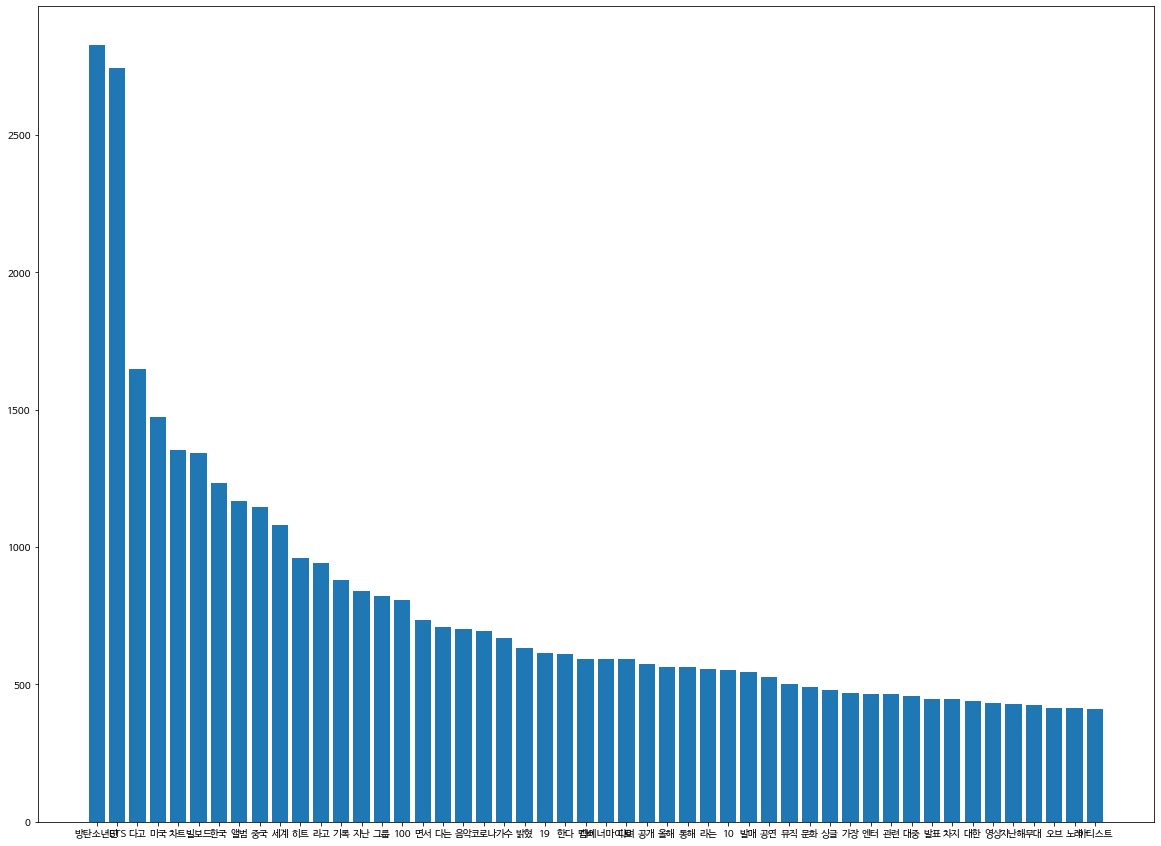

In [18]:
sorted_keys = sorted(vocab, key=vocab.get, reverse=True)
sorted_values = sorted(vocab.values(), reverse=True)

plt.figure(figsize=(20,15))
plt.rc('font', family='NanumBarunGothic') 
plt.bar(range(50), sorted_values[:50])
plt.xticks(range(50), sorted_keys[:50])
plt.show()

## Mecab 명사 토큰화

In [19]:
data_df['tokenized_mecab_noun'] = data_df.article_original.apply(lambda x : mecab.nouns(x))  # 명사 토큰화
data_df.head()

media  ...                               tokenized_mecab_noun
0  조선일보  ...  [년, 싸이, 번, 방송, 라이브, 쇼, 중계, 전, 지구, 그룹, 사회, 소개, ...
1  조선일보  ...  [방탄소년단, 미국, 선정, 년, 음악, 변화, 대, 아티스트, 선정, 월, 일, ...
2  조선일보  ...  [트, 이스, 도쿄, 돔, 공연, 블랙, 핑크, 앨범, 예정, 경자, 년, 새해, ...
3  조선일보  ...  [팝, 관심, 세계, 서울시, 바, 팝, 명소, 선정, 홍보, 한국, 외국인, 관광...
4  조선일보  ...  [골든, 글로브, 시상식, 한국, 최초, 외국어, 영화상, 기생충, 봉준호, 감독,...

[5 rows x 7 columns]

In [20]:
data_df['tokenized_mecab_noun'] = data_df.tokenized_mecab_noun.apply(lambda x: [w for w in x if w not in stopword]) # 불용어 제거
data_df.head()

media  ...                               tokenized_mecab_noun
0  조선일보  ...  [싸이, 번, 방송, 라이브, 쇼, 중계, 전, 지구, 그룹, 사회, 소개, 방탄소...
1  조선일보  ...  [방탄소년단, 미국, 선정, 음악, 변화, 대, 아티스트, 선정, 현지, 음악, 장...
2  조선일보  ...  [트, 이스, 도쿄, 돔, 공연, 블랙, 핑크, 앨범, 예정, 경자, 새해, 팝, ...
3  조선일보  ...  [팝, 관심, 세계, 서울시, 바, 팝, 명소, 선정, 홍보, 한국, 외국인, 관광...
4  조선일보  ...  [골든, 글로브, 시상식, 한국, 최초, 외국어, 영화상, 기생충, 봉준호, 감독,...

[5 rows x 7 columns]

In [21]:
li_noun = [ w for s in data_df.tokenized_mecab_noun for w in s if len(w)>1]
vocab_noun = Counter(li_noun)
vocab_noun.most_common(20)

[('방탄소년단', 2827),
 ('미국', 1475),
 ('차트', 1354),
 ('빌보드', 1341),
 ('한국', 1232),
 ('앨범', 1167),
 ('중국', 1146),
 ('세계', 1079),
 ('히트', 959),
 ('기록', 880),
 ('그룹', 821),
 ('음악', 701),
 ('코로나', 696),
 ('가수', 670),
 ('멤버', 593),
 ('다이너마이트', 593),
 ('공개', 576),
 ('올해', 558),
 ('발매', 547),
 ('공연', 520)]

In [22]:
len(vocab_noun)

11493

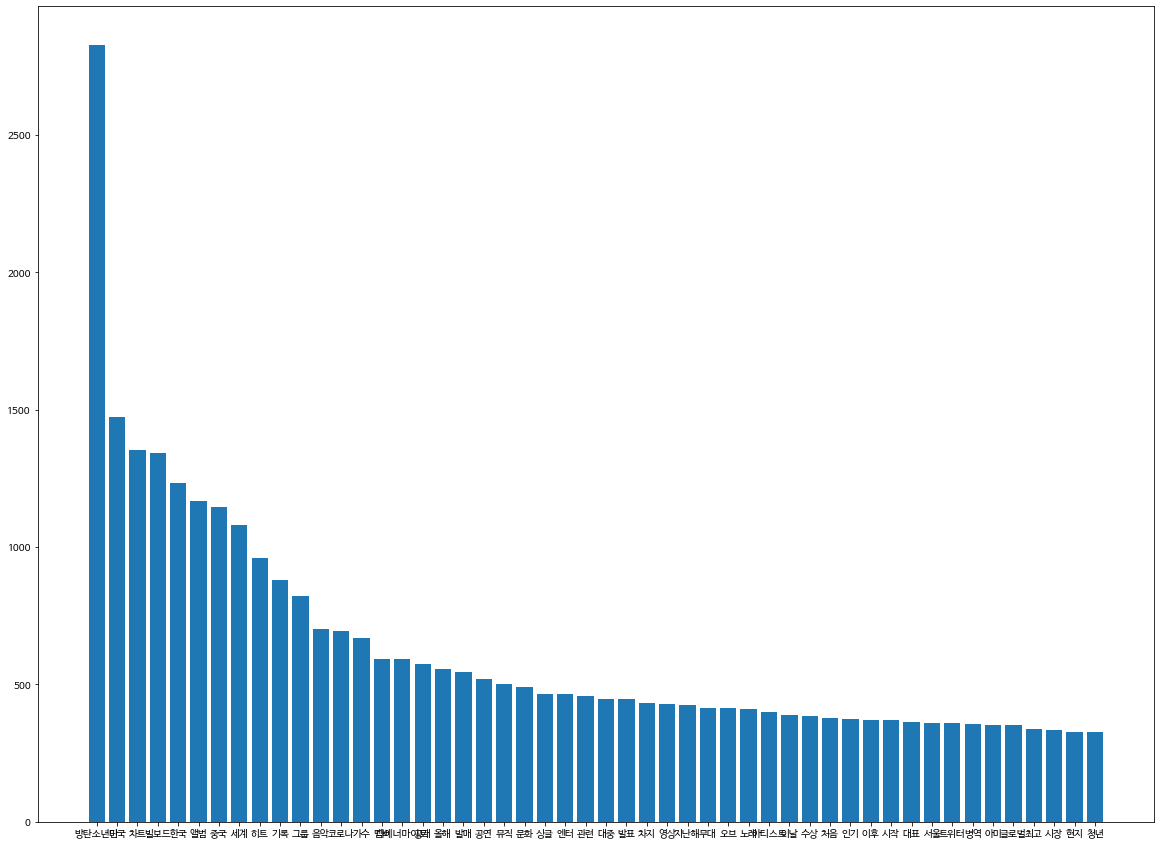

In [23]:
sorted_nkeys = sorted(vocab_noun, key=vocab.get, reverse=True)
sorted_nvalues = sorted(vocab_noun.values(), reverse=True)

plt.figure(figsize=(20,15))
plt.rc('font', family='NanumBarunGothic') 
plt.bar(range(50), sorted_nvalues[:50])
plt.xticks(range(50), sorted_nkeys[:50])
plt.show()

## 기간 별 뉴스 갯수

In [24]:
data_df.columns

Index(['media', 'date', 'title', 'article_original', 'url', 'tokenized_mecab',
       'tokenized_mecab_noun'],
      dtype='object')

In [25]:
date_groupby = data_df.groupby(by='date').count()['article_original'].reset_index()
print(type(date_groupby))
date_groupby

<class 'pandas.core.frame.DataFrame'>


date  article_original
0    2020-01-02                 2
1    2020-01-03                 2
2    2020-01-06                 1
3    2020-01-07                 3
4    2020-01-08                 3
..          ...               ...
247  2020-12-24                 2
248  2020-12-25                 2
249  2020-12-26                 3
250  2020-12-29                 1
251  2020-12-30                 2

[252 rows x 2 columns]

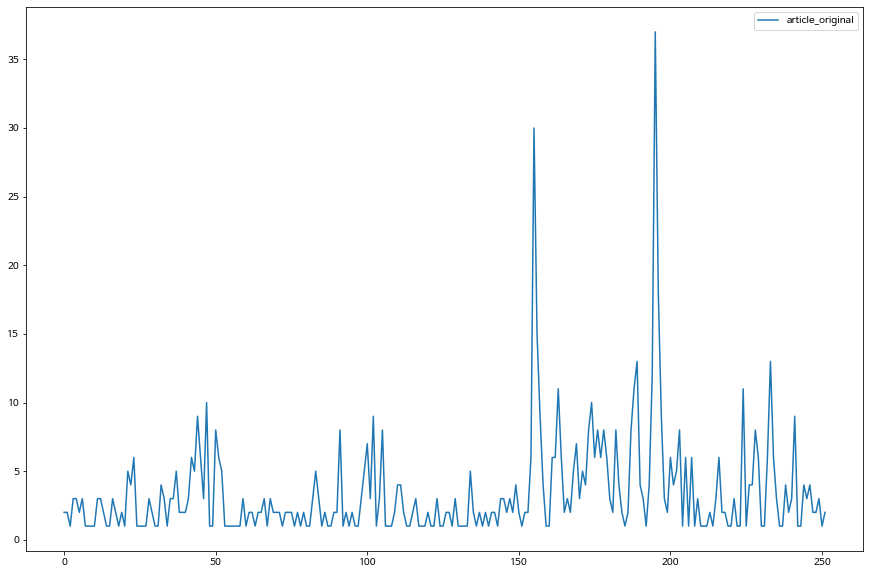

In [26]:
# 출처: https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

# plot data
fig, ax = plt.subplots(figsize=(15,10))
plt.rc('font', family='NanumBarunGothic') 
date_groupby.plot(ax=ax)

In [27]:
search_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/bts_search_datalab.xlsx')
search_data.head()

date    amount
0  2020-01-01  43.85227
1  2020-01-02  22.75566
2  2020-01-03  17.47025
3  2020-01-04  21.59224
4  2020-01-05  32.13055

In [28]:
search_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   amount  366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [29]:
search_data.rename(columns={'amount':'search_amount'}, inplace=True)
search_data.head()

date  search_amount
0  2020-01-01       43.85227
1  2020-01-02       22.75566
2  2020-01-03       17.47025
3  2020-01-04       21.59224
4  2020-01-05       32.13055

In [ ]:
# 일자별 뉴스 건 수
news_amount_list =[]
for i in range(search_data.shape[0]):
  isin = False
  for j in range(date_groupby.shape[0]):
    if date_groupby['date'].loc[j] == search_data['date'].loc[i]:
      news_amount_list.append(date_groupby['article_original'].loc[j])
      isin = True
      break
    elif j == date_groupby.shape[0]-1 and isin == False:
      news_amount_list.append(0)
      

# print(len(news_amount_list))
news_amount_list

In [31]:
max_ = pd.Series(news_amount_list).max()
search_data['news_amount'] = pd.Series(news_amount_list).apply(lambda x : x / max_ * 100) #선명하게 비교하기 위함
search_data

date  search_amount  news_amount
0    2020-01-01       43.85227     0.000000
1    2020-01-02       22.75566     5.405405
2    2020-01-03       17.47025     5.405405
3    2020-01-04       21.59224     0.000000
4    2020-01-05       32.13055     0.000000
..          ...            ...          ...
361  2020-12-27       15.85755     0.000000
362  2020-12-28       14.53832     0.000000
363  2020-12-29       14.21533     2.702703
364  2020-12-30       22.29620     5.405405
365  2020-12-31       22.45266     0.000000

[366 rows x 3 columns]

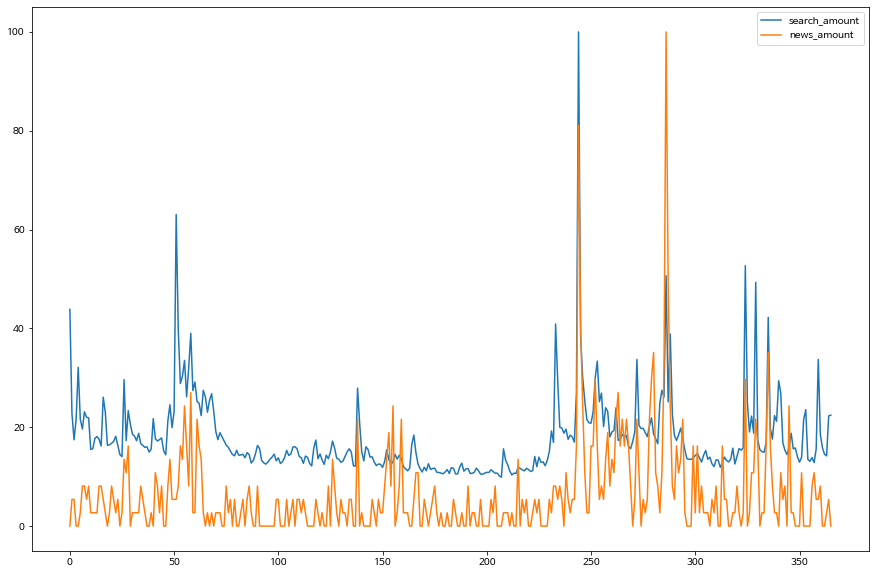

In [32]:
# plot data
fig, ax = plt.subplots(figsize=(15,10))
plt.rc('font', family='NanumBarunGothic') 

search_data.plot(ax=ax)

## 토픽 모델링으로 그룹화

In [33]:
# 각 토픽별로 연관도가 높은 순으로 word 나열
def display_topics(model, feature_names, no_top_words):
  topic_list = []
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    # components_  array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    # feature_concat = ','.join([feature_names[i] for i in top_indexes])
    feature_concat = [feature_names[i] for i in top_indexes]
    print(feature_concat)
    topic_list.append(feature_concat)

  return topic_list

In [86]:
# CountVectorizer : sklearn 제공
# - max_df: 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어를 제외하기 위함 
# - min_df: 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어를 제외하기 위함
# - max_features : 추출하는 feature의 개수 제한. 정수 지정
count_vect = CountVectorizer(max_df=1500, lowercase=False, min_df=10, stop_words=stopword)

In [88]:
# LDA (LatentDirichletAllocation) : sklearn 제공
# - n_components 파라미터를 이용해 이 토픽 개수를 조정함
lda = LatentDirichletAllocation(n_components=8, random_state=0)

In [84]:
# article_original - countVectorizer
fit_origin = count_vect.fit_transform(data_df.article_original)
print('CounterVectorizer Shape(Original):', fit_origin.shape)

lda.fit(fit_origin)
# CounterVectorizer 객체 내의 전체 word의 명칭을  get_feature_names()를 통해 추출
feature_names = count_vect.get_feature_names()

# 토픽 별 가장 연관도 높은 word를 15개만 추출
tol = display_topics(lda,feature_names, 15)
len(tol)

CounterVectorizer Shape(Original): (834, 52358)
Topic # 0
['있다', '함께', 'K팝', 'BTS', '말했다', '있는', '한국', '방탄소년단', '세계', '지난', '우리', '했다', '대한', '통해', '가장']
Topic # 1
['있다', '지난', '말했다', 'BTS', '방탄소년단', '했다', '있는', '오브', '코로나19', '사회적', '이태원', '미국', '함께', '이후', '통해']
Topic # 2
['중국', 'BTS', '미국', '방탄소년단', '했다', '그래미', '함께', '방탄소년단은', '있다', '한국', '지난', '관련', 'BTS는', '수상', '그룹']
Topic # 3
['BTS', '했다', '중국', '지난', '공연', '있다', '방탄소년단', '미국', '한국', '통해', '세계', '온라인', '공연을', '코로나19', '있는']
Topic # 4
['있다', '말했다', '있는', '했다', 'BTS', '안마', '함께', '통해', '방탄소년단', '대한', '같은', '하는', '지난해', '의자', '한국']
Topic # 5
['미국', '있다', 'BTS', '방탄소년단', '베스트', '지난', '방탄소년단은', '밝혔다', '통해', '있는', '오브', '말했다', 'K팝', '함께', '했다']
Topic # 6
['BTS', '있다', '방탄소년단', '병역', '빅히트', '빅히트는', '지난', '밝혔다', '것으로', '말했다', '대한', '빅히트의', '있는', '통해', '있다고']
Topic # 7
['빌보드', '앨범', '차트', '미국', '100', '방탄소년단', '1위를', '싱글', '방탄소년단은', 'BTS', '1위에', '오브', '있다', '한국', '지난']


8

In [89]:
# tokenized_mecab_noun
fit_noun = count_vect.fit_transform(data_df.tokenized_mecab_noun.apply(lambda x : ' '.join(w for w in x)))
print('CounterVectorizer Shape(mecab_noun):',fit_noun.shape)

lda.fit(fit_noun)
# CounterVectorizer 객체 내의 전체 word의 명칭을  get_feature_names()를 통해 추출
feature_names = count_vect.get_feature_names()

# 토픽 별 가장 연관도 높은 word를 15개만 추출
topic_list = display_topics(lda,feature_names, 15)
len(topic_list)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['가서', '같은', '것과', '결과에', '결론을', '관계가', '관련이', '그런', '그럼에도', '그렇게', '그에', '그치지', '김에', '까닭에', '낫다', '년도', '논하지', '누가', '다시', '달려', '대로', '대해', '되는', '되다', '되어', '들면', '들자면', '듯하다', '따르는', '따름이다', '따지지', '때가', '만은', '만이', '만큼', '많은', '말하면', '말할것도', '몰라도', '몰랏다', '못하다', '미치다', '바꾸어서', '바꿔', '밖에', '방면으로', '보면', '보아', '부류의', '비길수', '비추어', '뿐만', '사람들', '상대적으로', '생각이다', '서술한바와같이', '쓰여', '아니다', '아니라', '안다', '안된다', '않고', '않기', '않는다면', '않다', '않다면', '않도록', '않으면', '알겠는가', '어쩔수', '어찌됏든', '없고', '없다', '예를', '외에', '요만한', '우에', '위에서', '이렇게', '이로', '이르다', '이와', '이유는', '인하여', '임에', '점에서', '정도에', '정도의', '종합한것과같이', '주저하지', '줄은', '지경이다', '틀림없다', '편이', '하고', '하기', '하기만', '하는', '하는것만', '하는것이', '하다', '하면', '하지', '한하다', '할수록', '함으로써', '해도', '해서는', '형식으로', '힘이'] not in stop_words.
  'stop_words.' % sorted(inconsistent)

CounterVectorizer Shape(mecab_noun): (834, 1785)
Topic # 0
['영상', '슈가', '방탄소년단', '서울', '공개', '멤버', '홍보', '현대차', '존스', '서울관광', '여행', '유튜브', '믹스테이프', '캠페인', '활동']
Topic # 1
['차트', '빌보드', '방탄소년단', '앨범', '기록', '미국', '발매', '다이너마이트', '차지', '가수', '그룹', '오브', '정상', '판매량', '세계']
Topic # 2
['병역', '문화', '대중', '특례', '예술', '연기', '의원', '문제', '장관', '분야', '민주당', '위원', '최고', '방탄소년단', '국민']
Topic # 3
['방탄소년단', '세계', '청년', '한국', '미국', '코로나', '대통령', '노래', '음악', '메시지', '멤버', '사람', '시작', '마음', '생각']
Topic # 4
['중국', '한국', '전쟁', '미국', '관련', '네티즌', '발언', '역사', '수상', '소감', '방탄소년단', '희생', '보도', '삼성전자', '제품']
Topic # 5
['방탄소년단', '그래미', '후보', '올해', '미국', '시상식', '무대', '부문', '그룹', '음악', '워즈', '수상', '베스트', '뮤직', '빌보드']
Topic # 6
['히트', '공연', '방탄소년단', '엔터', '콘서트', '코로나', '상장', '세계', '시장', '기업', '대표', '소속', '투자', '온라인', '투어']
Topic # 7
['미술', '방탄소년단', '작가', '코로나', '현대', '작품', '광고', '전시', '정국', '세계', '사회', '멤버', '출연', '방문', '이태원']


8

In [38]:
# tokenized_mecab_noun
fit_noun = count_vect.fit_transform(data_df.tokenized_mecab_noun.apply(lambda x : ' '.join(w for w in x if '방탄소년단' not in w)))
print('CounterVectorizer Shape(mecab_noun):',fit_noun.shape)

lda.fit(fit_noun)
# CounterVectorizer 객체 내의 전체 word의 명칭을  get_feature_names()를 통해 추출
feature_names = count_vect.get_feature_names()

# 토픽 별 가장 연관도 높은 word를 15개만 추출
tl = display_topics(lda,feature_names, 15)
len(tl)

CounterVectorizer Shape(mecab_noun): (863, 1860)
Topic # 0
['미국', '그래미', '후보', '트위터', '올해', '음악', '세계', '워즈', '그룹', '케이', '선정', '한국', '가수', '인종', '흑인']
Topic # 1
['부문', '올해', '시상식', '무대', '베스트', '수상', '공연', '그룹', '코로나', '세계', '아티스트', '지난해', '뮤직', '달러', '미국']
Topic # 2
['중국', '한국', '병역', '전쟁', '문화', '관련', '미국', '문제', '네티즌', '발언', '대중', '특례', '논란', '역사', '연기']
Topic # 3
['공연', '콘서트', '코로나', '세계', '멤버', '무대', '온라인', '슈가', '히트', '미국', '라이브', '유튜브', '서울', '행사', '투어']
Topic # 4
['앨범', '차트', '빌보드', '기록', '발매', '미국', '뮤직', '오브', '공개', '비디오', '가수', '그룹', '음악', '발표', '정규']
Topic # 5
['빌보드', '차트', '다이너마이트', '미국', '기록', '차지', '라디오', '정상', '순위', '가수', '스트리밍', '연속', '발매', '집계', '한국']
Topic # 6
['히트', '엔터', '시장', '상장', '대표', '영상', '판매', '기업', '투자', '브랜드', '멤버', '매출', '공개', '글로벌', '지난해']
Topic # 7
['청년', '세계', '코로나', '한국', '미술', '사람', '사회', '작가', '시작', '멤버', '메시지', '문화', '작품', '노래', '세대']


8

(863, 863)
[[1.         0.26168486 0.2057513  ... 0.22313314 0.07344211 0.10366989]
 [0.26168486 1.         0.16987895 ... 0.16996732 0.07745967 0.05918745]
 [0.2057513  0.16987895 1.         ... 0.12896518 0.03537303 0.17668278]
 ...
 [0.22313314 0.16996732 0.12896518 ... 1.         0.08777075 0.14295692]
 [0.07344211 0.07745967 0.03537303 ... 0.08777075 1.         0.07641066]
 [0.10366989 0.05918745 0.17668278 ... 0.14295692 0.07641066 1.        ]]


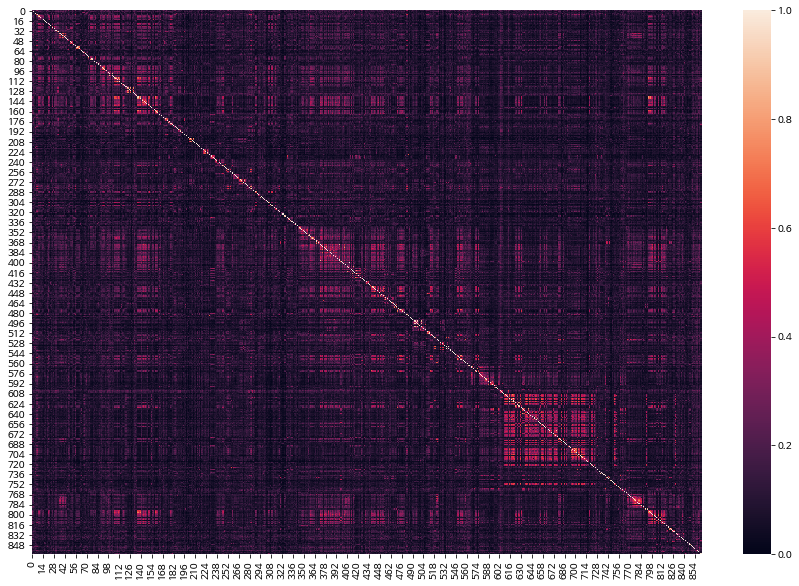

In [39]:
# cosine similarity - article_origin(CountVectorizer)
cos_sim = cosine_similarity(fit_origin,fit_origin)
print(cos_sim.shape)
print(cos_sim)
plt.figure(figsize=(15,10))
sns.heatmap(cos_sim)

(863, 863)
[[1.         0.22387292 0.22819306 ... 0.24151817 0.02571404 0.14927306]
 [0.22387292 1.         0.28049628 ... 0.19691158 0.03630631 0.18000255]
 [0.22819306 0.28049628 1.         ... 0.16234013 0.02873479 0.25847863]
 ...
 [0.24151817 0.19691158 0.16234013 ... 1.         0.09847931 0.22932423]
 [0.02571404 0.03630631 0.02873479 ... 0.09847931 1.         0.06909143]
 [0.14927306 0.18000255 0.25847863 ... 0.22932423 0.06909143 1.        ]]


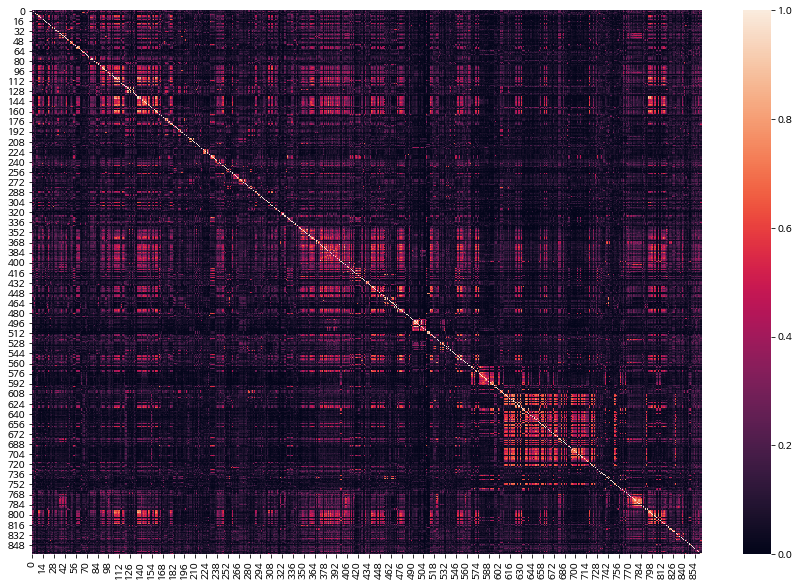

In [40]:
# cosine similarity - mecab noun(CountVectorizer)*****
cos_sim = cosine_similarity(fit_noun,fit_noun)
print(cos_sim.shape)
print(cos_sim)
plt.figure(figsize=(15,10))
sns.heatmap(cos_sim)

In [41]:
# TfidfVectorizer
# - tokenizer = LemNormalize 표준화, 사전(dic)에 기반한 표준화 
# rn = rhinoMorph.startRhino()
# text_analyzed = rhinoMorph.onlyMorph_list(rn, data_df.article_original, pos=['NNG','NNP','NP','VV','VA','IC','MM','MAG','MAJ'], eomi=True)
tfidf_vect = TfidfVectorizer(stop_words=stopword, ngram_range=(1,2), min_df=10, max_df=2000)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['가서', '같은', '것과', '결과에', '결론을', '관계가', '관련이', '그런', '그럼에도', '그렇게', '그에', '그치지', '김에', '까닭에', '낫다', '년도', '논하지', '누가', '다시', '달려', '대로', '대해', '되는', '되다', '되어', '들면', '들자면', '듯하다', '따르는', '따름이다', '따지지', '때가', '만은', '만이', '만큼', '많은', '말하면', '말할것도', '몰라도', '몰랏다', '못하다', '미치다', '바꾸어서', '바꿔', '밖에', '방면으로', '보면', '보아', '부류의', '비길수', '비추어', '뿐만', '사람들', '상대적으로', '생각이다', '서술한바와같이', '쓰여', '아니다', '아니라', '안다', '안된다', '않고', '않기', '않는다면', '않다', '않다면', '않도록', '않으면', '알겠는가', '어쩔수', '어찌됏든', '없고', '없다', '예를', '외에', '요만한', '우에', '위에서', '이렇게', '이로', '이르다', '이와', '이유는', '인하여', '임에', '점에서', '정도에', '정도의', '종합한것과같이', '주저하지', '줄은', '지경이다', '틀림없다', '편이', '하고', '하기', '하기만', '하는', '하는것만', '하는것이', '하다', '하면', '하지', '한하다', '할수록', '함으로써', '해도', '해서는', '형식으로', '힘이'] not in stop_words.
  'stop_words.' % sorted(inconsistent)

(863, 863)
[[1.         0.15410544 0.12776644 ... 0.13945185 0.01111704 0.04472781]
 [0.15410544 1.         0.05372645 ... 0.07898542 0.03341726 0.01649761]
 [0.12776644 0.05372645 1.         ... 0.06894567 0.00914533 0.1084977 ]
 ...
 [0.13945185 0.07898542 0.06894567 ... 1.         0.06875761 0.07295119]
 [0.01111704 0.03341726 0.00914533 ... 0.06875761 1.         0.03673012]
 [0.04472781 0.01649761 0.1084977  ... 0.07295119 0.03673012 1.        ]]


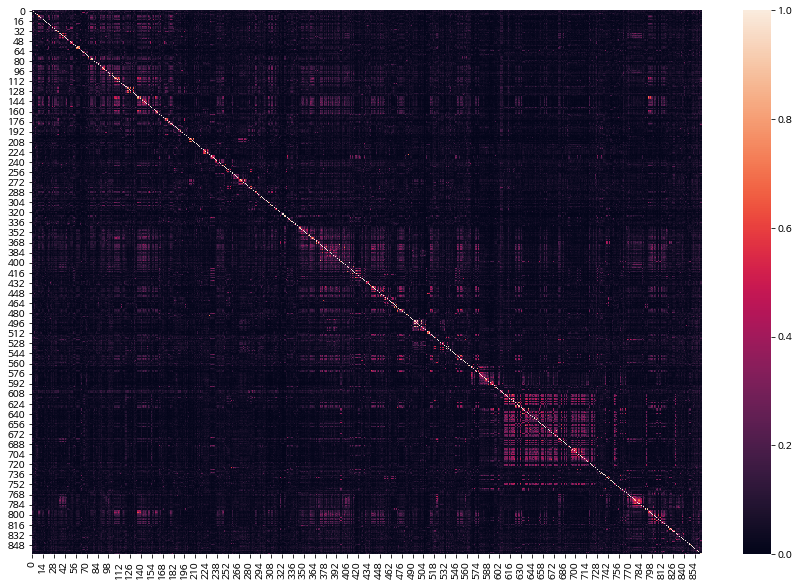

In [42]:
# article_original - TfidfVectorizer
fit_tf_origin = tfidf_vect.fit_transform(data_df.article_original)

# cosine similarity - TfidfVectorizer
cos_sim_tf = cosine_similarity(fit_tf_origin,fit_tf_origin)
print(cos_sim_tf.shape)
print(cos_sim_tf)
plt.figure(figsize=(15,10))
sns.heatmap(cos_sim_tf)

(863, 863)
[[1.         0.15390125 0.15115779 ... 0.1285043  0.01352779 0.05541073]
 [0.15390125 1.         0.11448876 ... 0.09653066 0.02771348 0.09022838]
 [0.15115779 0.11448876 1.         ... 0.08074715 0.02398189 0.16790026]
 ...
 [0.1285043  0.09653066 0.08074715 ... 1.         0.05492834 0.09706205]
 [0.01352779 0.02771348 0.02398189 ... 0.05492834 1.         0.03963129]
 [0.05541073 0.09022838 0.16790026 ... 0.09706205 0.03963129 1.        ]]


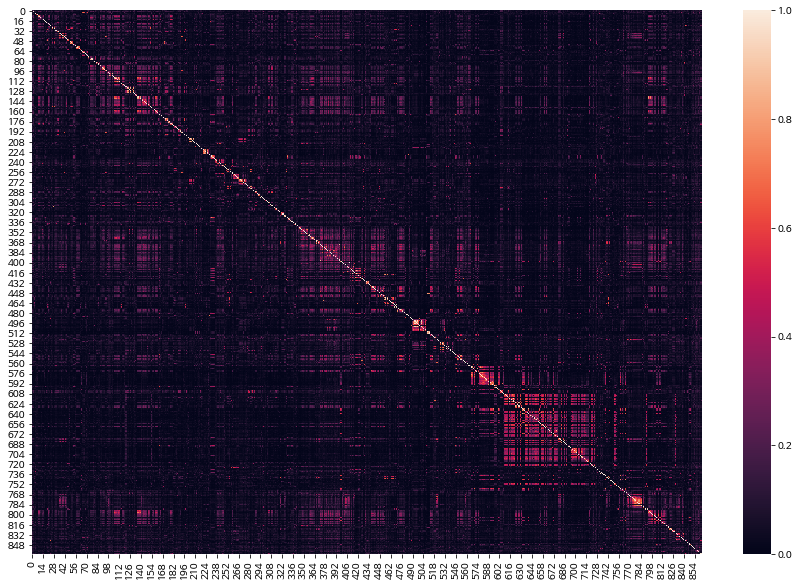

In [43]:
# mecab noun - TfidfVectorizer
fit_tf_noun = tfidf_vect.fit_transform(data_df.tokenized_mecab_noun.apply(lambda x:' '.join([w for w in x])))

# cosine similarity - mecab noun
cos_sim_tf = cosine_similarity(fit_tf_noun,fit_tf_noun)
print(cos_sim_tf.shape)
print(cos_sim_tf)
plt.figure(figsize=(15,10))
sns.heatmap(cos_sim_tf)

In [44]:
data_df.reset_index(inplace=True)
sorted_index = cos_sim.argsort()[:,::-1][:,1:11]
sim_list = []
for i, srtl in enumerate(sorted_index):
  from_ = i-100
  to_ = i+100
  if i<100:
    from_ =0
  elif i+100>sorted_index.shape[0]:
    to_ = sorted_index.shape[0]
  tmp=[]
  for j in srtl.tolist():
    if from_<j<to_:
      tmp.append(j)
    else:
      continue
  if len(tmp)<1:
    sim_list.append(None)
  else:
    sim_list.append(tmp)

print(len(sim_list))
data_df['similar_docs'] = pd.Series(sim_list) # 유사도 큰 순 정렬, 자기자신 제외
data_df

863


index  ...              similar_docs
0        0  ...          [52, 73, 43, 41]
1        1  ...                      None
2        2  ...        [79, 8, 94, 9, 99]
3        3  ...                      None
4        4  ...  [66, 65, 68, 72, 71, 67]
..     ...  ...                       ...
858    866  ...           [859, 857, 855]
859    867  ...      [814, 815, 804, 812]
860    868  ...           [852, 853, 857]
861    869  ...                     [819]
862    870  ...                     [842]

[863 rows x 9 columns]

In [45]:
datetime.strptime(data_df.date[0], "%Y-%m-%d")

datetime.datetime(2020, 1, 2, 0, 0)

In [46]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 863 non-null    int64 
 1   media                 863 non-null    object
 2   date                  863 non-null    object
 3   title                 863 non-null    object
 4   article_original      863 non-null    object
 5   url                   863 non-null    object
 6   tokenized_mecab       863 non-null    object
 7   tokenized_mecab_noun  863 non-null    object
 8   similar_docs          834 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.8+ KB


In [47]:
data_df.dropna(how='any', inplace=True)

In [48]:
data_df

index  ...              similar_docs
0        0  ...          [52, 73, 43, 41]
2        2  ...        [79, 8, 94, 9, 99]
4        4  ...  [66, 65, 68, 72, 71, 67]
5        5  ...                      [38]
6        6  ...                   [7, 55]
..     ...  ...                       ...
858    866  ...           [859, 857, 855]
859    867  ...      [814, 815, 804, 812]
860    868  ...           [852, 853, 857]
861    869  ...                     [819]
862    870  ...                     [842]

[834 rows x 9 columns]

In [49]:
data_df['sim_docs_len'] = data_df['similar_docs'].apply(lambda x : len(x))
data_df

index media  ...              similar_docs sim_docs_len
0        0  조선일보  ...          [52, 73, 43, 41]            4
2        2  조선일보  ...        [79, 8, 94, 9, 99]            5
4        4  조선일보  ...  [66, 65, 68, 72, 71, 67]            6
5        5  조선일보  ...                      [38]            1
6        6  조선일보  ...                   [7, 55]            2
..     ...   ...  ...                       ...          ...
858    866   한겨레  ...           [859, 857, 855]            3
859    867   한겨레  ...      [814, 815, 804, 812]            4
860    868  조선일보  ...           [852, 853, 857]            3
861    869  중앙일보  ...                     [819]            1
862    870   한겨레  ...                     [842]            1

[834 rows x 10 columns]

In [50]:
data_df.sim_docs_len.max()

10

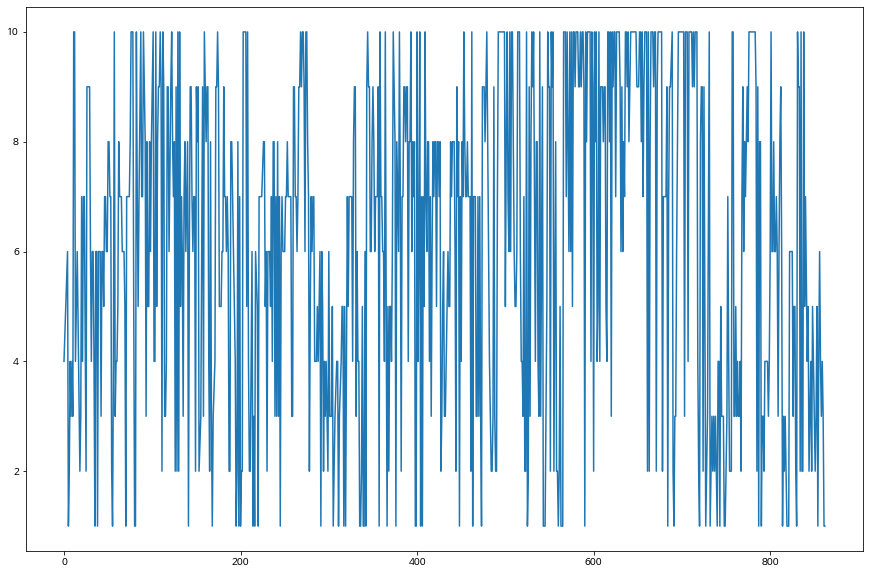

In [51]:
plt.figure(figsize=(15,10))
plt.plot(data_df.sim_docs_len)

In [52]:
def getTopic(doc, topic):
  topic_cnt=np.zeros(len(topic))
  for i,words in enumerate(topic):
    for word in words:
      if word in doc:
        topic_cnt[i] +=1
  return topic_cnt


In [53]:
data_df['cnt_per_topic'] = data_df['tokenized_mecab_noun'].apply(lambda x : getTopic(x, topic_list))
data_df.head()

index media  ... sim_docs_len                              cnt_per_topic
0      0  조선일보  ...            4   [7.0, 1.0, 5.0, 5.0, 6.0, 4.0, 9.0, 7.0]
2      2  조선일보  ...            5  [4.0, 2.0, 12.0, 7.0, 6.0, 2.0, 7.0, 7.0]
4      4  조선일보  ...            6   [7.0, 1.0, 1.0, 2.0, 2.0, 4.0, 3.0, 6.0]
5      5  조선일보  ...            1  [8.0, 1.0, 11.0, 6.0, 6.0, 5.0, 8.0, 5.0]
6      6  조선일보  ...            2   [3.0, 5.0, 7.0, 2.0, 2.0, 2.0, 3.0, 2.0]

[5 rows x 11 columns]

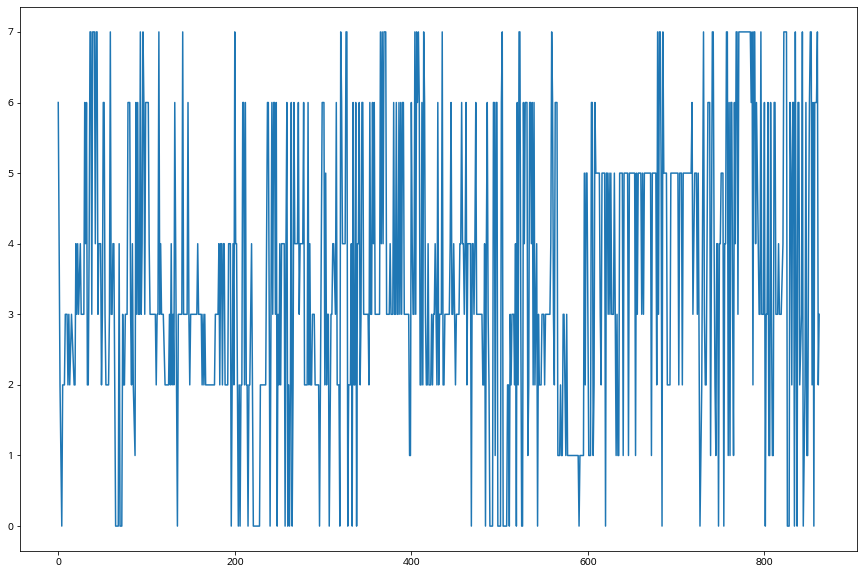

In [54]:
data_df['topic_num'] = data_df['cnt_per_topic'].apply(lambda x : np.argmax(x))
plt.figure(figsize=(15,10))
plt.plot(data_df.topic_num)

In [58]:
data_df.columns

Index(['index', 'media', 'date', 'title', 'article_original', 'url',
       'tokenized_mecab', 'tokenized_mecab_noun', 'similar_docs',
       'sim_docs_len', 'cnt_per_topic', 'topic_num'],
      dtype='object')

In [61]:
for i,t in enumerate(topic_list):
  print('topic #',i,'\n',t)

topic # 0 
 ['트위터', '코로나', '청년', '대통령', '사회', '세계', '한국', '미국', '영화', '달러', '방탄소년단', '올해', '감독', '케이', '문화', '아티스트', '기생충', '이태원', '관련', '방문']
topic # 1 
 ['병역', '문화', '대중', '특례', '예술', '연기', '의원', '문제', '방탄소년단', '분야', '위원', '민주당', '장관', '최고', '병역법', '주장', '입영', '예술인', '논의', '활동']
topic # 2 
 ['히트', '공연', '콘서트', '엔터', '방탄소년단', '상장', '코로나', '기업', '시장', '투자', '소속', '투어', '대표', '세계', '매출', '예정', '회사', '온라인', '그룹', '취소']
topic # 3 
 ['차트', '방탄소년단', '빌보드', '앨범', '기록', '미국', '다이너마이트', '발매', '차지', '오브', '판매량', '공개', '그룹', '가수', '세계', '스트리밍', '정상', '순위', '뮤직', '음원']
topic # 4 
 ['방탄소년단', '영상', '세계', '서울', '멤버', '한국', '미술', '사람', '코로나', '작가', '시작', '현대', '브랜드', '공개', '패션', '작품', '아미', '유튜브', '스타', '광고']
topic # 5 
 ['중국', '한국', '전쟁', '미국', '관련', '네티즌', '역사', '발언', '수상', '소감', '희생', '보도', '방탄소년단', '논란', '양국', '환구', '한미', '시보', '플리트상', '주년']
topic # 6 
 ['방탄소년단', '차트', '앨범', '빌보드', '음악', '미국', '가수', '영어', '노래', '대중', '슈가', '한국', '한국어', '데뷔', '멤버', '발매', '기록', '그룹', '세계', '뮤직']
topic # 7 
 ['방탄소년단

In [59]:
data_df.loc[:,['date','article_original','tokenized_mecab','tokenized_mecab_noun','similar_docs','cnt_per_topic','topic_num']]

date  ... topic_num
0    2020-01-02  ...         6
2    2020-01-03  ...         2
4    2020-01-06  ...         0
5    2020-01-07  ...         2
6    2020-01-07  ...         2
..          ...  ...       ...
858  2020-12-26  ...         6
859  2020-12-26  ...         6
860  2020-12-29  ...         7
861  2020-12-30  ...         2
862  2020-12-30  ...         3

[834 rows x 7 columns]